In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from time import time

In [2]:
train_df = pd.read_csv('../input/news-classification/Data/train_set.csv', sep='\t')
train_df.sample(10)

,label,text
56533,4,2410 4411 1215 3641 2923 5430 6405 2786 465 26...
187861,7,3166 5520 6835 5296 3961 1227 6651 1154 4293 2...
30931,0,5397 6248 5681 6908 2304 4659 4464 3659 6482 2...
96220,0,5810 6308 1866 7495 6163 6981 5787 1395 2471 3...
4900,2,4646 7543 1924 6065 632 5063 743 4293 652 3982...
143107,6,5284 2109 151 3300 1722 2595 4499 4641 6248 56...
68329,2,1219 781 1402 5530 6324 6587 2891 3870 6040 56...
83794,1,5803 307 3770 5036 307 5176 3659 3700 7186 681...
47672,7,3021 2410 4321 2621 5099 7134 7539 4780 1730 5...
126977,5,4040 368 1160 1334 7492 2252 5780 5977 6298 42...


In [3]:
train_df.shape

(200000, 2)

In [4]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
train_df['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

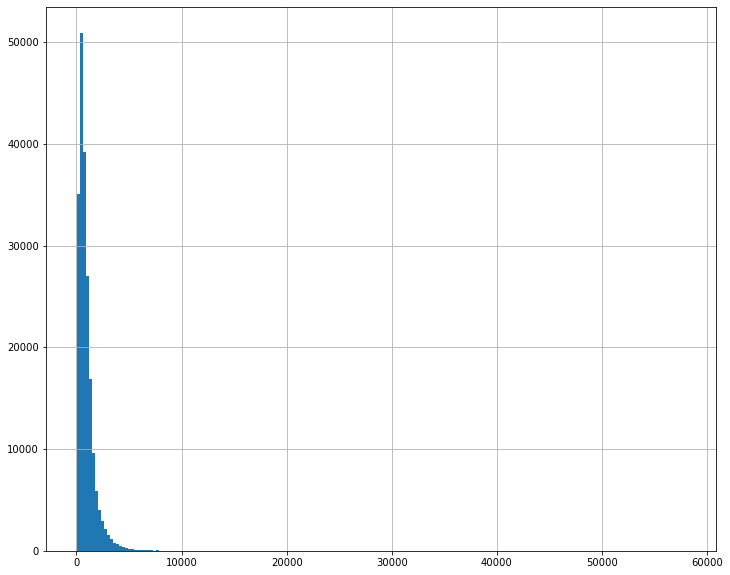

In [5]:
plt.figure(figsize=(12,10))
train_df['text_len'].hist(bins=200)

Text(0.5, 0, 'category')

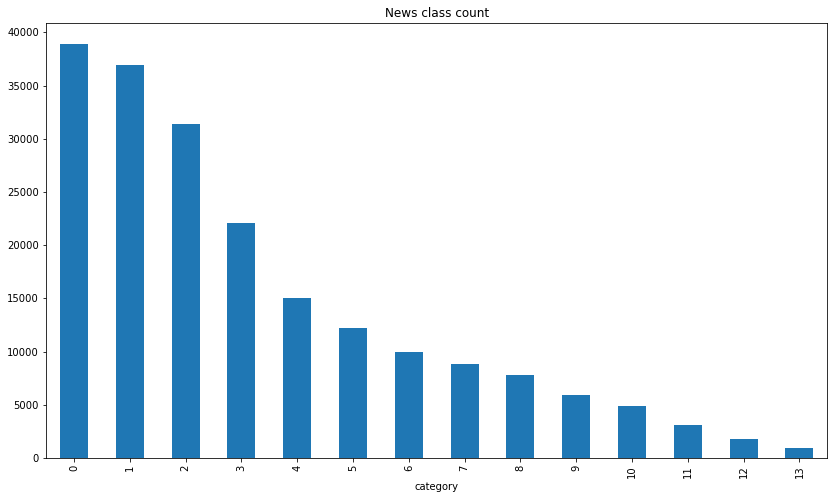

In [6]:
plt.figure(figsize=(14,8))
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

In [7]:
from collections import Counter

all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
del all_lines
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

print('Total number of words:', len(word_count), '\n')
print('Most 5 frequent words:')
print(word_count[:5])
print('Least 5 frequent words:')
print(word_count[-5:])

Total number of words: 6869 

Most 5 frequent words:
[('3750', 7482224), ('648', 4924890), ('900', 3262544), ('3370', 2020958), ('6122', 1602363)]
Least 5 frequent words:
[('155', 1), ('1415', 1), ('1015', 1), ('4468', 1), ('3133', 1)]


In [8]:
def sentence_num(s: str):
    l = s.split(' ')
    return l.count('3750') + l.count('900') + l.count('648')

train_df['setence_num'] = train_df['text'].apply(sentence_num)
train_df.sample(10)

,label,text,text_len,setence_num
139911,6,2595 2282 803 1132 3946 1635 1610 2555 3648 24...,18732,1510
109441,8,531 292 2738 3019 4464 1324 1629 5677 1407 446...,444,11
31233,8,5705 3523 1241 4068 2465 669 5620 7282 6314 27...,132,11
9562,2,4411 4181 7292 2918 2967 742 7539 3508 1907 24...,545,53
123396,0,2400 4411 6469 1647 4612 6825 5589 1667 3781 1...,593,56
161727,5,1252 1899 3220 7528 5310 1160 226 7492 2610 54...,257,28
147644,1,1141 4411 1070 1036 2621 4480 1152 3870 1647 1...,67,3
65527,8,7251 4261 3686 1471 299 7349 3531 6822 4063 21...,90,12
52366,0,670 3961 5520 2147 2091 2400 4063 670 3961 313...,1410,142
153692,8,1070 2107 2211 1141 913 5860 913 3342 6206 726...,246,20


In [9]:
print('Average number of words in a sentence:', train_df['setence_num'].mean())

Average number of words in a sentence: 78.34829


In [15]:
t0 = time()
most_common_words = {}

for i in range(14):
    all_lines = ' '.join(list(train_df.loc[train_df['label']==i, 'text']))
    count = Counter(all_lines.split(' '))
    most_common_words[i] = count.most_common(5)

print('Processing time(s):', time()-t0)
for k, v in most_common_words.items():
    print(k, v)

Processing time(s): 42.505282402038574
{0: [('3750', 1267331), ('648', 967653), ('900', 577742)], 1: [('3750', 1200686), ('648', 714152), ('3370', 626708)], 2: [('3750', 1458331), ('648', 974639), ('900', 618294)], 3: [('3750', 774668), ('648', 494477), ('900', 298663)], 4: [('3750', 360839), ('648', 231863), ('900', 190842)], 5: [('3750', 715740), ('648', 329051), ('900', 305241)], 6: [('3750', 469540), ('648', 345372), ('900', 222488)], 7: [('3750', 428638), ('648', 262220), ('900', 184131)], 8: [('3750', 242367), ('648', 202399), ('900', 92207)], 9: [('3750', 178783), ('648', 157291), ('900', 70680)], 10: [('3750', 180259), ('648', 114512), ('900', 75185)], 11: [('3750', 83834), ('648', 67353), ('900', 37240)], 12: [('3750', 87412), ('4464', 51426), ('3370', 45815)], 13: [('3750', 33796), ('648', 26867), ('900', 11263)]}
